In [1]:
pip install matplotlib

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns;
df = pd.read_csv("vgsales.csv")

In [3]:
df.dropna(how = "any",inplace = True)



# Sucesso de jogos nas plataformas

In [4]:
df=df.assign(lancamentos = 1)

(array([13.,  6., 10.,  9.,  7.,  7.,  2.,  4.,  2.,  2.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

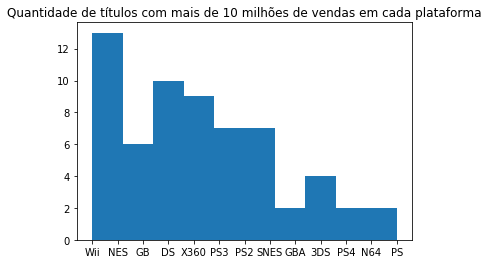

In [10]:
plt.title("Quantidade de títulos com mais de 10 milhões de vendas em cada plataforma")
plt.hist(df.loc[Global_S > 10]["Platform"])

(array([1388.,   97., 2131., 1234., 1304., 2366.,  786.,  499.,  336.,
        1505.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

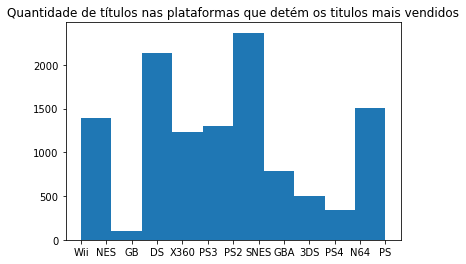

In [11]:
plt.title("Quantidade de títulos nas plataformas que detém os titulos mais vendidos")
plt.hist(df["Platform"].loc[df["Platform"].isin(list(df.loc[Global_S > 10]["Platform"].unique()))])


In [5]:
print("Quantidade de títulos: "+
    str(df["Name"].shape[0])+
      "\nQuantidade de nomes únicos: "+
    str(df["Name"].unique().shape[0])
     )

Quantidade de títulos: 16291
Quantidade de nomes únicos: 11325


Pode-se perceber que vários títulos estão repetidos, ou seja, um mesmo jogo aparece varias vezes pois são vários lancamentos em diferentes consoles. Faz sentido juntar os valores dessas vendas para analizar os jogos.

(array([51., 10.,  9., 10.,  6.,  3.,  2.,  1.,  0.,  1.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

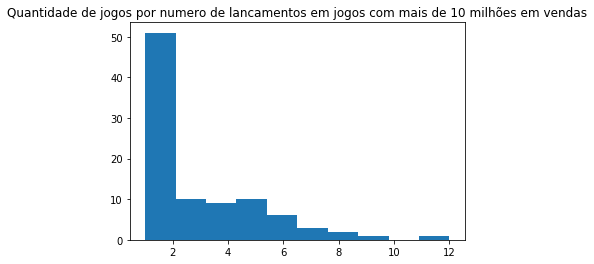

In [12]:
#Juntando os títulos de um mesmo jogo que foi lancado em diversos consoles
df_jogos = df.groupby(["Name"]).sum().sort_values('Global_Sales',ascending=False)[["Global_Sales","lancamentos"]]
top_jogos = df_jogos.loc[df_jogos["Global_Sales"]>10]
plt.title("Quantidade de jogos por numero de lancamentos em jogos com mais de 10 milhões em vendas")
plt.hist(top_jogos["lancamentos"])

A maioria dos jogos com mais de 10 milhões de vendas possuem apenas um único lançamento, então não são multiplataformas

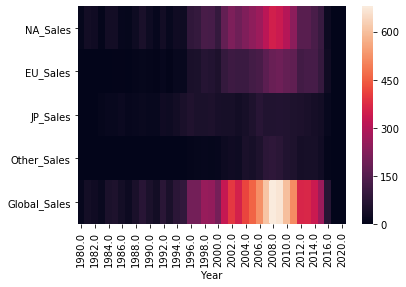

In [13]:
df_top_jogos = df.loc[df["Name"].isin(top_jogos.index)]

sns.heatmap(df.groupby(["Year"]).sum()[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].T)

(array([9., 5., 9., 1., 2., 2., 2., 4., 1., 2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

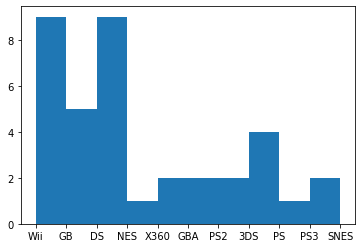

In [14]:
jogos_sucesso_plataforma_unica = list(top_jogos.loc[top_jogos["lancamentos"]==1].index)

plt.hist(df.loc[df["Name"].isin(jogos_sucesso_plataforma_unica)]["Platform"])


É possível perceber com as análises que a maioria dos jogos de sucesso não são aqueles disponíveis em varias plataformas, mas aqueles que são ofertados principalmente nos consoles da Nintendo, isso mostra que um jogo tende a obter muito mais vendas caso seja um jogo voltado à família, mesmo que exclusivamente em um console, e não aqueles jogos que são disponibilizados em diversos consoles.

# Franquias

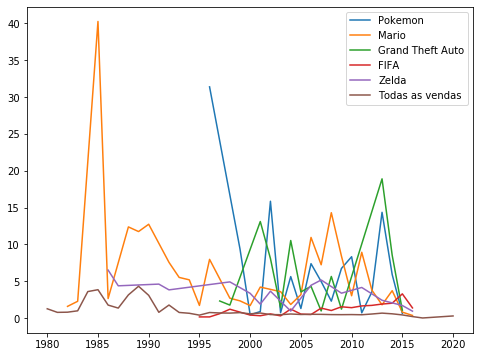

In [57]:
fig = plt.figure( figsize=(8,6))
ax = plt.axes()
jogos = ["Pokemon","Mario","Grand Theft Auto","FIFA","Zelda"]

for jogo in (jogos):
    df_jogo = df.loc[df["Name"].str.contains(jogo)]
    df_jogo = df_jogo.groupby(df["Year"]).mean()
    ax.plot(df_jogo['Year'], df_jogo['Global_Sales'], label = f'{jogo}')
    plt.legend()
df_jogo = df.groupby(df["Year"]).mean()
ax.plot(df_jogo.index, df_jogo['Global_Sales'], label = "Todas as vendas")
plt.legend()

As franquias de nomes conhecidos possuem, na maioria dos casos, numeros de vendas que distoam da média dos outros jogos, mas pelo gráfico pode-se perceber que nem só por um jogo possuir o nome de uma grande franquia em seu título ele terá sucesso, já que em alguns anos, até as grandes franquias tiveram resultados de venas abaixo da média.